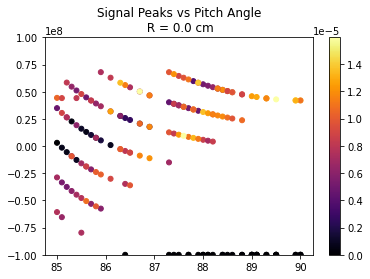

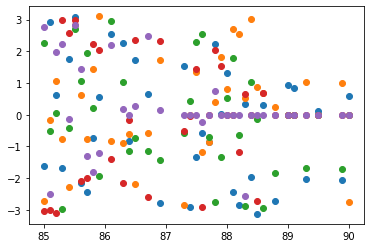

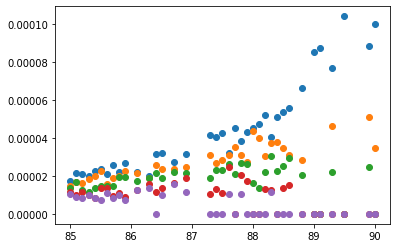

In [138]:
## imports ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
####

## global ##
dataPath='/Users/ziegler/repos/mayfly/output/templatePeaks1252021.pkl'
templatePitchAngles=np.linspace(85,90,51)
templatePos=np.linspace(0,5e-2,21)
radius=0.0
nPeaks=5
keysAmp=[]
keysInd=[]
keysR=[]
keysI=[]
for i in range(nPeaks):
    keysAmp.append('pAmp'+str(i))
    keysInd.append('pInd'+str(i))
    keysR.append('pR'+str(i))
    keysI.append('pI'+str(i))

colors=['r','b','g','c','m','k']
frequencyConversion=200e6/8192
####

## definitions ##

####

simulationPeaks=pd.read_pickle(dataPath)
peaksAtRadius=simulationPeaks[simulationPeaks["r"]==radius].sort_values('pa')
nEntries=peaksAtRadius['pa'].size

fig,axs=plt.subplots()
for i,key in enumerate(keysInd):
    axi=axs.scatter(peaksAtRadius['pa'],frequencyConversion*peaksAtRadius[key]-100e6,c=peaksAtRadius[keysAmp[i]],cmap='inferno',s=25)
plt.colorbar(axi)
axs.set_ylim(-100e6,100e6)
axs.set_title("Signal Peaks vs Pitch Angle\n R = " +str(radius*100)+" cm")
plt.savefig("/Users/ziegler/plots/signalPeaksVsPitchAngle2152021/peaksVsPitchAngleR"+str(radius)+".png")

fig,axs=plt.subplots()
for i,key in enumerate(keysInd):
    axs.scatter(peaksAtRadius['pa'],np.arctan2(peaksAtRadius[keysI[i]],peaksAtRadius[keysR[i]]))
    
fig,axs=plt.subplots()
for i,key in enumerate(keysInd):
    axs.scatter(peaksAtRadius['pa'],np.sqrt(peaksAtRadius[keysR[i]]**2+peaksAtRadius[keysI[i]]**2))
#plt.colorbar(axi)


#lines={}
#for entry in range(nEntries):
#    peaks=peaksAtRadius[['pa','pInd0','pInd1','pInd2','pInd3','pInd4']].iloc[entry]
#    nextPeaks=peaksAtRadius[['pa','pInd0','pInd1','pInd2','pInd3','pInd4']].iloc[entry+1]
#    if entry==0:
#        for i,key in enumerate(keysInd):
#            lines.update({i:[peaks[key]]})
#    else:
#        for i,keyLines in enumerate(lines): #loop over the lines that exist
#            iLine=lines[keyLine][-1] # get the last point in that line
#            distToNextPeaks=[]
#            for i,key2 in enumerate(keysInd):
#                distToNextPeaks.append((nextPeaks[key2]-iPeak)**2) # calculate the distance from the next 
                
            

In [ ]:
# get entries with r == radius sort by pitch angle
peaksAtRadius=simulationPeaks[simulationPeaks["r"]==radius].sort_values(by=['pa'])
peaksAtRadius.reset_index(inplace=True)
#print(len(np.where(peaksAtRadius['pAmp0']>10.)[0]))

lines={} # holds the (pitch angle, frequency) lines, permanent
linePeakIndexes=[] # holds the amplitude index of the peak (0-4) in the line, temporary
lineFreqIndexes=[] # holds the frequency index of the peak (0-8191) in the line, y coordinant, temporary, saved in lines
pitchAngles=[] # holds the pitch angle of the point (85-90) in the line, x coordinant, temporary, saved in lines
rowInds=[] # holds the row index that contains the pitch angle, used for setting the used elements to zero

# iterate through all the rows
for irow in range(len(peaksAtRadius['pa'])): # iterate through all the rows/pitch angles
    
    # check if the row contains any peaks with amplitude above zero
    # if not skip the row
    hasPeak=False
    for i in range(5):
        if peaksAtRadius.iloc[irow]['pAmp'+str(i)]>0: # check if any peak amplitudes is not zero in the row. This means that this row contains a point in a line
            hasPeak=True # we found a non-zero element in the row
            
    if not hasPeak:
        continue # otherwise skip the row
        
    rowInds.append(irow) # add row index to the list of rows we are using.

    # find highest frequency index in the row
    maxPeakInd=0
    maxFreqInd=peaksAtRadius.iloc[irow]['pInd'+str(0)]
    for i in range(5):
        if peaksAtRadius.iloc[irow]['pInd'+str(i)] > maxFreqInd:
            maxPeakInd=i
            maxFreqInd=peaksAtRadius.iloc[irow]['pInd'+str(i)]
            
    linePeakIndexes.append(maxPeakInd) # the number 0-4 of the peak that is in the line
    lineFreqIndexes.append(maxFreqInd) # the y coordinate of the line
    pitchAngles.append(peaksAtRadius.iloc[irow]['pa']) # the x coordinate of the line point
    
# find the start of the rightmost line
lineStart=np.max(np.where(np.diff(indexes,prepend=0)>100)) # find the rightmost disconsinuity that marks the start of the line

# create a numpy array of the line
line=np.array([pitchAngles[lineStart:],lineFreqIndexes[lineStart:]]) # create 2D array with the line x and y coordinates
# add the line to the dict of lines
lines.update({1:line}) # put the line in some sort of dictionary


print(rowInds[lineStart:])
# set the amplitude of the peaks in our line to zero
for irow in rowInds[lineStart:]:
    print(peaksAtRadius.iloc[irow]['pa'])
    peaksAtRadius.at[irow,'pAmp'+str(maxPeakInd)]=0.
    
# check if all amplitudes are zeros
#print(peaksAtRadius[keysAmp])

print


fig,axs=plt.subplots()
axs.plot(peaksAtRadius['pa'],indexes,'.')
axs.plot(peaksAtRadius['pa'],np.diff(indexes,prepend=0),'.')
axs.plot(peaksAtRadius['pa'][lineStart:],indexes[lineStart:],'.')
axs.set_ylim(0,8192)


# plot the highest peak index vs pitch angle
for i in range(1):
    fig,axs=plt.subplots()
    axs.plot(peaksAtRadius['pa'],peaksAtRadius['pInd'+str(i)],'r.')
axs.set_ylim(0,8192)


# scatter plot
fig,axs=plt.subplots()
for i in range(5):
    axi=axs.scatter(peaksAtRadius['pa'],peaksAtRadius['pInd'+str(i)],c=peaksAtRadius['pAmp'+str(i)],
                    cmap='inferno',s=50)
    
plt.colorbar(axi)
axs.set_ylim(0,8192)

In [89]:

#print(peaks90deg)
pa1cm=peaks1cm['pa']
peak0Ind1cm=peaks1cm['pInd0']
peak1Ind1cm=peaks1cm['pInd1']

peak0Amp1cm=peaks1cm['pAmp0']
peak1Amp1cm=peaks1cm['pAmp1']

peak01IndDiff=abs(peak0Ind1cm-peak1Ind1cm)
peak01AmpDiv=peak0Amp1cm/peak1Amp1cm
#peak0Ind1cm=peaks1cm[['pInd0','pInd1','pInd2','pInd3','pInd4']]
#peak0Amp1cm=peaks1cm[['pAmp0','pAmp1','pAmp2','pAmp3','pAmp4']]
peak0Amp1cm=peaks1cm[['pAmp0','pAmp1']]



peaks0cm=simulationPeaks[simulationPeaks["r"]==0.0].sort_values(by=['pa'])
#print(peaks90deg)
pa0cm=peaks0cm['pa']
peak0Ind0cm=peaks0cm['pInd0']





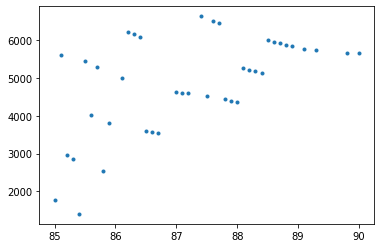

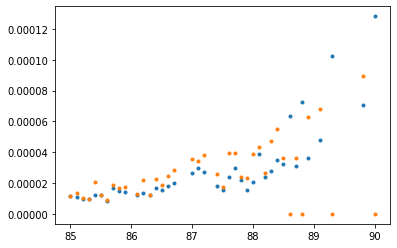

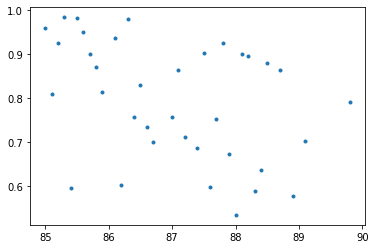

In [90]:
fig,axs=plt.subplots()
#axs.plot(pa0cm,peak0Ind0cm,'.')
axs.plot(pa1cm,peak0Ind1cm,'.')

#axs.set_yscale('log')

fig,axs=plt.subplots()
#axs.plot(pa0cm,peak0Ind0cm,'.')
axs.plot(pa1cm,peak0Amp1cm,'.')

fig,axs=plt.subplots()
#axs.plot(pa0cm,peak0Ind0cm,'.')
axs.plot(pa1cm,peak01AmpDiv,'.')

In [253]:
testDF=pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]})
print(testDF.take(,axis=0))
print(testDF)

TypeError: take() got multiple values for argument 'axis'

In [248]:
def getFrequencyPitchAngleBehavior(peaksAtRadius,lineDict,lineNumber=0):
    
    allAmplitudesAreZero=False
    while not allAmplitudesAreZero:
        linePeakIndexes=[] # holds the amplitude index of the peak (0-4) in the line, temporary
        lineFreqIndexes=[] # holds the frequency index of the peak (0-8191) in the line, y coordinant, temporary, saved in lines
        pitchAngles=[] # holds the pitch angle of the point (85-90) in the line, x coordinant, temporary, saved in lines
        rowInds=[] # holds the row index that contains the pitch angle, used for setting the used elements to zero

        # iterate through all the rows
        for irow in range(len(peaksAtRadius['pa'])): # iterate through all the rows/pitch angles

            # check if the row contains any peaks with amplitude above zero
            # if not skip the row
            hasPeak=False
            for i in range(5):
                if peaksAtRadius.iloc[irow]['pAmp'+str(i)]>0:# check if any peak amplitudes is not zero in the row. This means that this row contains a point in a line
                    print(peaksAtRadius.iloc[irow]['pAmp'+str(i)])
                    hasPeak=True # we found a non-zero element in the row
            if not hasPeak:
                continue # otherwise skip the row
            if hasPeak:
                rowInds.append(irow) # add row index to the list of rows we are using.

            # find highest frequency index in the row
            maxPeakInd=0
            maxFreqInd=peaksAtRadius.iloc[irow]['pInd'+str(0)]
            for i in range(5):
                if peaksAtRadius.iloc[irow]['pInd'+str(i)] > maxFreqInd:
                    maxPeakInd=i
                    maxFreqInd=peaksAtRadius.iloc[irow]['pInd'+str(i)]

            linePeakIndexes.append(maxPeakInd) # the number 0-4 of the peak that is in the line
            lineFreqIndexes.append(maxFreqInd) # the y coordinate of the line
            pitchAngles.append(peaksAtRadius.iloc[irow]['pa']) # the x coordinate of the line point

        # find the start of the rightmost line
        lineStart=np.max(np.where(np.diff(lineFreqIndexes,prepend=0)>100)) # find the rightmost disconsinuity that marks the start of the line

        # create a numpy array of the line
        line=np.array([pitchAngles[lineStart:],lineFreqIndexes[lineStart:]]) # create 2D array with the line x and y coordinates
        # add the line to the dict of lines
        lineDict.update({lineNumber:line}) # put the line in some sort of dictionary

        #print(peaksAtRadius[keysAmp])
        #print(rowInds[lineStart:])
        # set the amplitude of the peaks in our line to zero
        for irow in rowInds[lineStart:]:
            #print(peaksAtRadius.iloc[irow]['pa'])
            peaksAtRadius.at[irow,'pAmp'+str(maxPeakInd)]=
        #print(peaksAtRadius[keysAmp])

        # check if all amplitudes are zeros
        allAmplitudesAreZero=True
        for key in keysAmp:
            if len(np.where(peaksAtRadius[key]>0)[0])>0:
                allAmplitudesAreZero=False

        if not allAmplitudesAreZero:
            lineNumber+=1
            

    return True
    
# get entries with r == radius sort by pitch angle
peaksAtRadius=simulationPeaks[simulationPeaks["r"]==radius].sort_values(by=['pa'])
peaksAtRadius.reset_index(inplace=True)
lines={}
getFrequencyPitchAngleBehavior(peaksAtRadius,lines)

print(lines)

0    1
1    2
2    3
Name: a, dtype: int64


In [ ]:
peaksAtRadius=simulationPeaks[simulationPeaks["r"]==radius].sort_values(by=['pa'])
peaksAtRadius.reset_index(inplace=True)
dataDict=peaksAtRadius.to_dict()

rowInds=np.array(list(dataDict['pa'].keys()))


def findLines(lines,dataDict,nLine=0):
    potentialRowsInLine=[]
    linePeakIndexes=[] # holds the amplitude index of the peak (0-4) in the line, temporary
    lineFreqIndexes=[] # holds the frequency index of the peak (0-8191) in the line, y coordinant, temporary, saved in lines
    pitchAngles=[]
    for irow in rowInds:


        hasPeak=False

        for key in keysAmp:
            if dataDict[key][irow]>0: # check if any peak amplitudes is not zero in the row. 
                                      # This means that this row contains a point in a line
                hasPeak=True # we found a non-zero element in the row
        if hasPeak:
            potentialRowsInLine.append(irow)
        else:
            continue # otherwise skip the row

        # find highest frequency index in the row
        maxPeakInd=0
        maxFreqInd=dataDict['pInd'+str(0)][irow]
        for i,key in enumerate(keysInd):
            if dataDict[key][irow] > maxFreqInd:
                maxPeakInd=i
                maxFreqInd=dataDict[key][irow]

        #print(maxPeakInd,maxFreqInd)

        linePeakIndexes.append(maxPeakInd) # the number 0-4 of the peak that is in the line
        lineFreqIndexes.append(maxFreqInd) # the y coordinate of the line
        pitchAngles.append(dataDict['pa'][irow]) # the x coordinate of the line point

        # find the start of the rightmost line
        #print(lineFreqIndexes)
    if len(lineFreqIndexes)==0:
        return True
    #print(lineFreqIndexes)
    lineStart=np.max(np.where(np.diff(lineFreqIndexes,prepend=0)>150)) # find the rightmost disconsinuity that marks the start of the line
    #print(lineStart)
    # create a numpy array of the line
    line=np.array([pitchAngles[lineStart:],lineFreqIndexes[lineStart:]]) # create 2D array with the line x and y coordinates
    # add the line to the dict of lines
    lines.update({nLine:line}) # put the line in a dictionary


    # remove the points in the line from the data dictionary
    for i,irow in enumerate(potentialRowsInLine):
        if i>=lineStart:
            dataDict['pAmp'+str(linePeakIndexes[i])][irow]=0
            dataDict['pInd'+str(linePeakIndexes[i])][irow]=-1

    allPeaksDone=True
    for key in keysAmp:
        if len(list(dataDict[key].keys()))>0:
            allPeaksDone=False

    if not allPeaksDone:
        nLine+=1
        #print(line)
        findLines(lines,dataDict,nLine=nLine)
    else:
        return True

    
lines={}
findLines(lines,dataDict)

fig,axs=plt.subplots()
for i,key in enumerate(lines):
    axs.plot(lines[key][0,:],lines[key][1,:],'.')
    